In [15]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.externals import joblib

In [16]:
# Read data using pandas

df=pd.read_csv("C:/Users/kumar/OneDrive/Desktop/Data Science/Project Files/Mushroom.csv")

In [17]:
df.head()

,Class,capshape,capsurface,capcolor,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-sur-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring no,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [18]:
df.shape

(8124, 23)

In [19]:
df.describe()

,Class,capshape,capsurface,capcolor,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-sur-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring no,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [20]:
# class distribution of target 
print(df.groupby('Class').size())

Class
e    4208
p    3916
dtype: int64


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Class                   8124 non-null   object
 1   capshape                8124 non-null   object
 2   capsurface              8124 non-null   object
 3   capcolor                8124 non-null   object
 4   bruises                 8124 non-null   object
 5   odor                    8124 non-null   object
 6   gill-attachment         8124 non-null   object
 7   gill-spacing            8124 non-null   object
 8   gill-size               8124 non-null   object
 9   gill-color              8124 non-null   object
 10  stalk-shape             8124 non-null   object
 11  stalk-root              8124 non-null   object
 12  stalk-sur-above-ring    8124 non-null   object
 13  stalk-sur-below-ring    8124 non-null   object
 14  stalk-color-above-ring  8124 non-null   object
 15  stal

In [22]:
# Check for skewness : 
df.skew()

Series([], dtype: float64)

In [23]:
data=pd.get_dummies(df)
data.head()

,Class_e,Class_p,capshape_b,capshape_c,capshape_f,capshape_k,capshape_s,capshape_x,capsurface_f,capsurface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [24]:
import pandas as pd

cols = data.columns.tolist()
print(cols)

['Class_e', 'Class_p', 'capshape_b', 'capshape_c', 'capshape_f', 'capshape_k', 'capshape_s', 'capshape_x', 'capsurface_f', 'capsurface_g', 'capsurface_s', 'capsurface_y', 'capcolor_b', 'capcolor_c', 'capcolor_e', 'capcolor_g', 'capcolor_n', 'capcolor_p', 'capcolor_r', 'capcolor_u', 'capcolor_w', 'capcolor_y', 'bruises_f', 'bruises_t', 'odor_a', 'odor_c', 'odor_f', 'odor_l', 'odor_m', 'odor_n', 'odor_p', 'odor_s', 'odor_y', 'gill-attachment_a', 'gill-attachment_f', 'gill-spacing_c', 'gill-spacing_w', 'gill-size_b', 'gill-size_n', 'gill-color_b', 'gill-color_e', 'gill-color_g', 'gill-color_h', 'gill-color_k', 'gill-color_n', 'gill-color_o', 'gill-color_p', 'gill-color_r', 'gill-color_u', 'gill-color_w', 'gill-color_y', 'stalk-shape_e', 'stalk-shape_t', 'stalk-root_?', 'stalk-root_b', 'stalk-root_c', 'stalk-root_e', 'stalk-root_r', 'stalk-sur-above-ring_f', 'stalk-sur-above-ring_k', 'stalk-sur-above-ring_s', 'stalk-sur-above-ring_y', 'stalk-sur-below-ring_f', 'stalk-sur-below-ring_k', 'st

In [25]:
import pandas as pd

data=pd.get_dummies(df)

feature_cols = ['Class_e', 'Class_p', 'capshape_b', 'capshape_c', 'capshape_f', 'capshape_k', 'capshape_s', 'capshape_x', 'capsurface_f', 'capsurface_g', 'capsurface_s', 'capsurface_y', 'capcolor_b', 'capcolor_c', 'capcolor_e', 'capcolor_g', 'capcolor_n', 'capcolor_p', 'capcolor_r', 'capcolor_u', 'capcolor_w', 'capcolor_y', 'bruises_f', 'bruises_t', 'odor_a', 'odor_c', 'odor_f', 'odor_l', 'odor_m', 'odor_n', 'odor_p', 'odor_s', 'odor_y', 'gill-attachment_a', 'gill-attachment_f', 'gill-spacing_c', 'gill-spacing_w', 'gill-size_b', 'gill-size_n', 'gill-color_b', 'gill-color_e', 'gill-color_g', 'gill-color_h', 'gill-color_k', 'gill-color_n', 'gill-color_o', 'gill-color_p', 'gill-color_r', 'gill-color_u', 'gill-color_w', 'gill-color_y', 'stalk-shape_e', 'stalk-shape_t', 'stalk-root_?', 'stalk-root_b', 'stalk-root_c', 'stalk-root_e', 'stalk-root_r', 'stalk-sur-above-ring_f', 'stalk-sur-above-ring_k', 'stalk-sur-above-ring_s', 'stalk-sur-above-ring_y', 'stalk-sur-below-ring_f', 'stalk-sur-below-ring_k', 'stalk-sur-below-ring_s', 'stalk-sur-below-ring_y', 'stalk-color-above-ring_b', 'stalk-color-above-ring_c', 'stalk-color-above-ring_e', 'stalk-color-above-ring_g', 'stalk-color-above-ring_n', 'stalk-color-above-ring_o', 'stalk-color-above-ring_p', 'stalk-color-above-ring_w', 'stalk-color-above-ring_y', 'stalk-color-below-ring_b', 'stalk-color-below-ring_c', 'stalk-color-below-ring_e', 'stalk-color-below-ring_g', 'stalk-color-below-ring_n', 'stalk-color-below-ring_o', 'stalk-color-below-ring_p', 'stalk-color-below-ring_w', 'stalk-color-below-ring_y', 'veil-type_p', 'veil-color_n', 'veil-color_o', 'veil-color_w', 'veil-color_y', 'ring no_n', 'ring no_o', 'ring no_t', 'ring-type_e', 'ring-type_f', 'ring-type_l', 'ring-type_n', 'ring-type_p', 'spore-print-color_b', 'spore-print-color_h', 'spore-print-color_k', 'spore-print-color_n', 'spore-print-color_o', 'spore-print-color_r', 'spore-print-color_u', 'spore-print-color_w', 'spore-print-color_y', 'population_a', 'population_c', 'population_n', 'population_s', 'population_v', 'population_y', 'habitat_d', 'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u', 'habitat_w']

X = data[feature_cols]

y = data.Class_e  # y is a vector, hence we use dot to access 'label'

In [26]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(8124, 119)


In [27]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(8124,)


In [28]:
# EDA Process for Class_e (target) i.e edible /poisonous mushroom

In [29]:
# Splitting X and y into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [30]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()        # instantiate model
logreg.fit(X_train, y_train)         # fit model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
# make class predictions for the testing set
from sklearn import metrics

y_pred_class = logreg.predict(X_test)

# Classification accuracy: percentage of correct predictions
print(metrics.accuracy_score(y_test, y_pred_class))

1.0


In [32]:
# check class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

1    1020
0    1011
Name: Class_e, dtype: int64

In [33]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

1.0

In [34]:
# Load libraries
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [35]:
# Spot Check Algorithms

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:    
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 1.000000 (0.000000)
LDA: 0.999508 (0.000752)
KNN: 0.999836 (0.000492)
CART: 1.000000 (0.000000)
NB: 1.000000 (0.000000)
SVM: 1.000000 (0.000000)


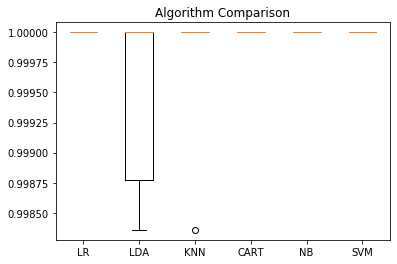

In [36]:
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# From sklearn matrics import accuracy_score,confusion_matrix,classification_reports
# Cross validation Libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# scoring parameters for classification
# scoring =[accuracy,f1,f1_micro,f1_macro,roc_auc]

sv=SVC()
score=cross_val_score(sv,X,y,cv=20,scoring='accuracy')
print('accuracy score=',score)
print ('mean scores',score.mean)
print('std',score.std())
y_pred = cross_val_predict(sv,X,y,cv=5)

print('Y prediction values')
print(y_pred)

conf_mat = confusion_matrix(y,y_pred)
conf_mat

from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

In [ ]:
from sklearn.externals import joblib 

joblib_file = "joblib_svrbf.pkl"             # Save to file in the current working directory
joblib.dump(svrbf, joblib_file)
joblib_svrbf = joblib.load(joblib_file)      # Load from file

#score=cross_val_predict(svrbf_from_joblib,X,y,cv=5)
score=cross_val_score(svrbf,X,y,cv=5)
print(score)

Conclusion-
Best mean score = 100
Logistic Regression,Decision Tree Classifier,Support Vector & GaussianNB best fits for this dataset."